In [2]:
%matplotlib inline
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from VIIRS.VNP09GA import VNP09GA

In [3]:
VNP09GA_C1 = VNP09GA(working_directory="~/data/VNP09GA_C1_testing", collection=1)
VNP09GA_C1

VNP09GA
{
  "collection": 1,
  "concept_ID": "C1373412034-LPDAAC_ECS",
  "working_directory": "/Users/halverso/data/VNP09GA_C1_testing",
  "download_directory": "/Users/halverso/data/VNP09GA_C1_testing/VNP09GA_download"
}

In [4]:
VNP09GA_C2 = VNP09GA(working_directory="~/data/VNP09GA_C1_testing", collection=2)
VNP09GA_C2

VNP09GA
{
  "collection": 2,
  "concept_ID": "C2631841556-LPCLOUD",
  "working_directory": "/Users/halverso/data/VNP09GA_C1_testing",
  "download_directory": "/Users/halverso/data/VNP09GA_C1_testing/VNP09GA_download"
}

In [5]:
C2_granule = VNP09GA_C2.granule("2024-02-14", "h08v05")
C2_granule

[2024-06-07 15:51:48 INFO] searching VNP09GA tile h08v05 date 2024-02-14
[2024-06-07 15:51:49 INFO] found the following granules for VIIRS using the CMR search:
[2024-06-07 15:51:49 INFO]   VNP09GA.A2024045.h08v05.002.2024046104455
[2024-06-07 15:51:49 INFO] number of VIIRS granules found using CMR search: 1
[2024-06-07 15:51:49 WARNING] Found more VIIRS granules than expected
[2024-06-07 15:51:49 INFO] All VIIRS granules have already been downloaded


{
  "filename": "/Users/halverso/data/VNP09GA_C1_testing/VNP09GA_download/VNP09GA/2024.02.14/VNP09GA.A2024045.h08v05.002.2024046104455.h5",
  "products_directory": "/Users/halverso/data/VNP09GA_C1_testing/VNP09GA_products"
}

[2024-06-07 15:51:49 INFO] opening VIIRS file: /Users/halverso/data/VNP09GA_C1_testing/VNP09GA_download/VNP09GA/2024.02.14/VNP09GA.A2024045.h08v05.002.2024046104455.h5
[2024-06-07 15:51:49 INFO] loading HDFEOS/GRIDS/VIIRS_Grid_500m_2D/Data Fields/SurfReflect_I1_1 at 463.31 m resolution
[2024-06-07 15:51:49 INFO] opening VIIRS file: /Users/halverso/data/VNP09GA_C1_testing/VNP09GA_download/VNP09GA/2024.02.14/VNP09GA.A2024045.h08v05.002.2024046104455.h5
[2024-06-07 15:51:49 INFO] loading HDFEOS/GRIDS/VIIRS_Grid_500m_2D/Data Fields/SurfReflect_I2_1 at 463.31 m resolution


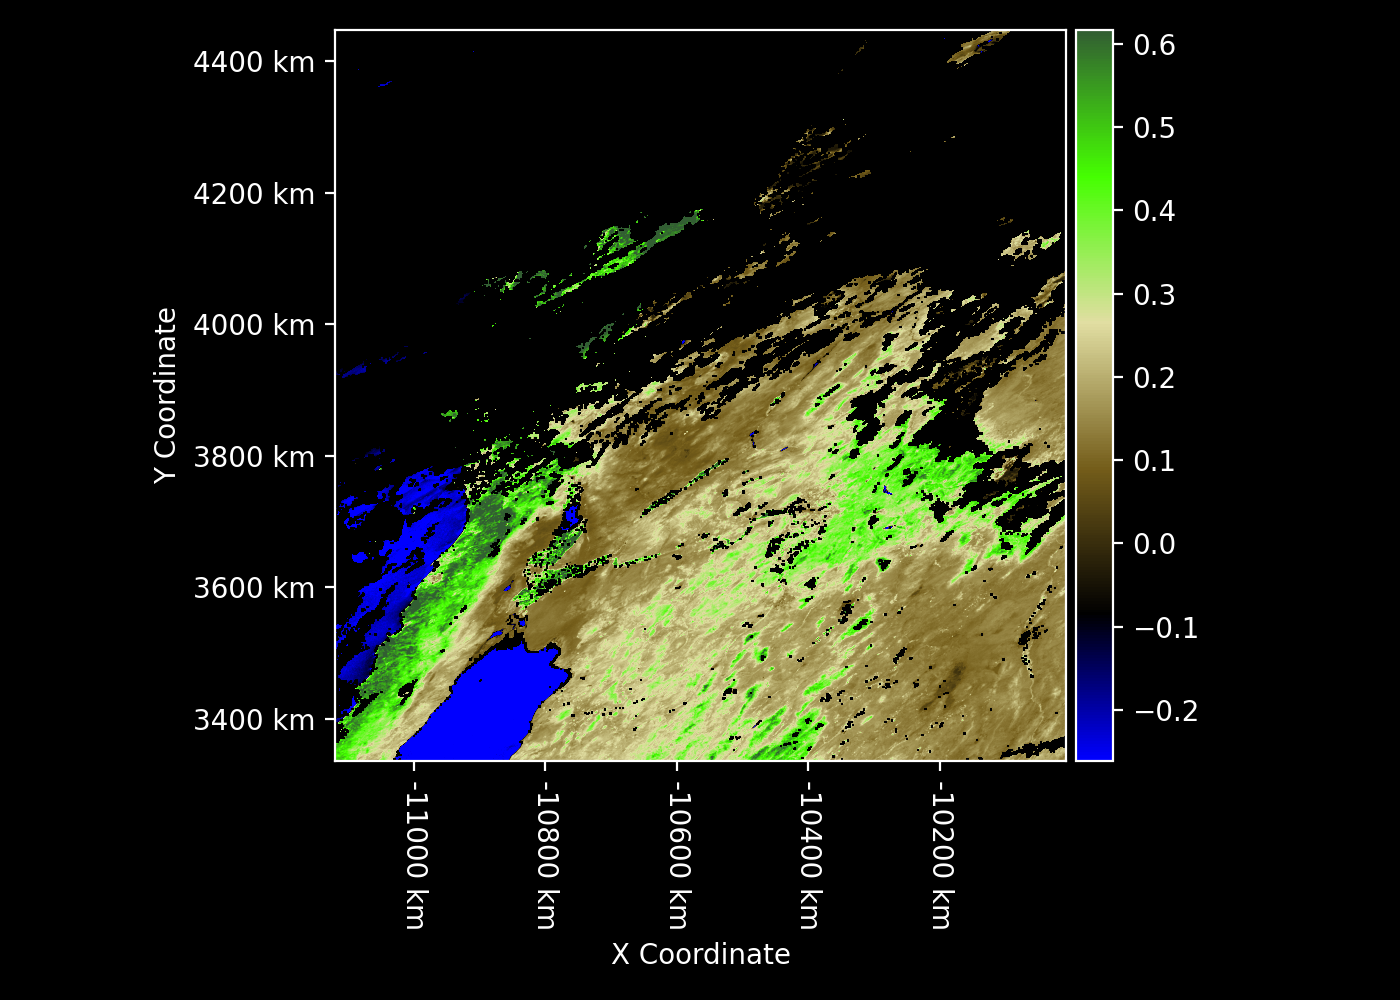

In [6]:
NDVI_C2 = C2_granule.NDVI
NDVI_C2

In [7]:
C1_granule = VNP09GA_C1.granule("2024-02-14", "h08v05")
C1_granule

[2024-06-07 15:51:50 INFO] searching VNP09GA tile h08v05 date 2024-02-14
[2024-06-07 15:51:54 INFO] found the following granules for VIIRS using the CMR search:
[2024-06-07 15:51:54 INFO]   SC:VNP09GA.001:2663475296
[2024-06-07 15:51:54 INFO] number of VIIRS granules found using CMR search: 1
[2024-06-07 15:51:54 WARNING] Found more VIIRS granules than expected
[2024-06-07 15:51:54 INFO] All VIIRS granules have already been downloaded


{
  "filename": "/Users/halverso/data/VNP09GA_C1_testing/VNP09GA_download/VNP09GA/2024.02.14/VNP09GA.A2024045.h08v05.001.2024046103742.h5",
  "products_directory": "/Users/halverso/data/VNP09GA_C1_testing/VNP09GA_products"
}

[2024-06-07 15:51:55 INFO] opening VIIRS file: /Users/halverso/data/VNP09GA_C1_testing/VNP09GA_download/VNP09GA/2024.02.14/VNP09GA.A2024045.h08v05.001.2024046103742.h5
[2024-06-07 15:51:55 INFO] loading HDFEOS/GRIDS/VNP_Grid_500m_2D/Data Fields/SurfReflect_I1_1 at 463.31 m resolution
[2024-06-07 15:51:55 INFO] opening VIIRS file: /Users/halverso/data/VNP09GA_C1_testing/VNP09GA_download/VNP09GA/2024.02.14/VNP09GA.A2024045.h08v05.001.2024046103742.h5
[2024-06-07 15:51:55 INFO] loading HDFEOS/GRIDS/VNP_Grid_500m_2D/Data Fields/SurfReflect_I2_1 at 463.31 m resolution


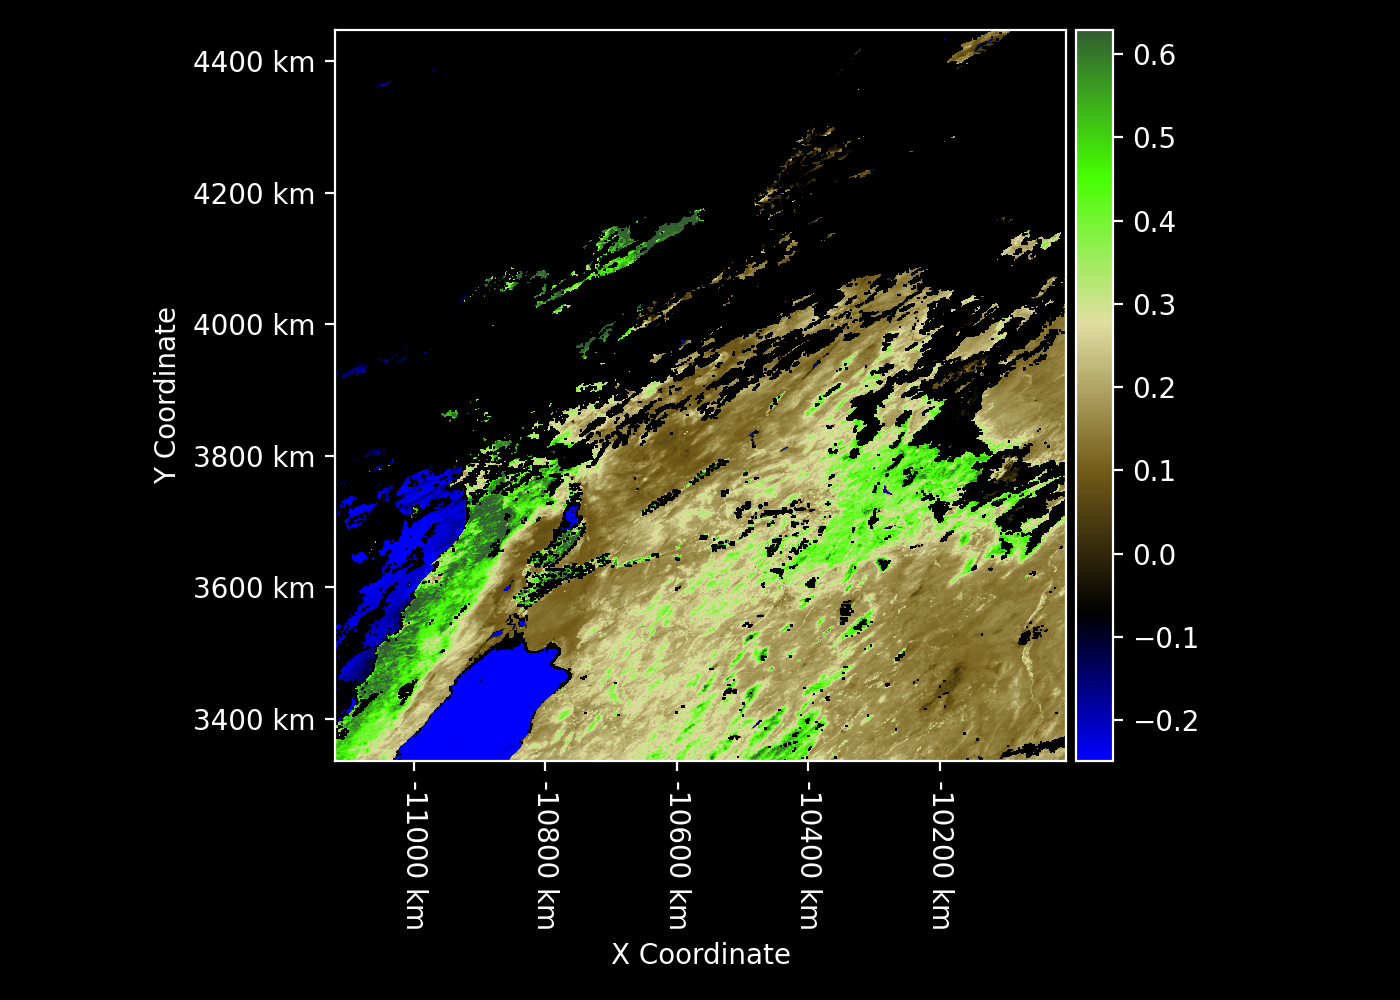

In [8]:
NDVI_C1 = C1_granule.NDVI
NDVI_C1

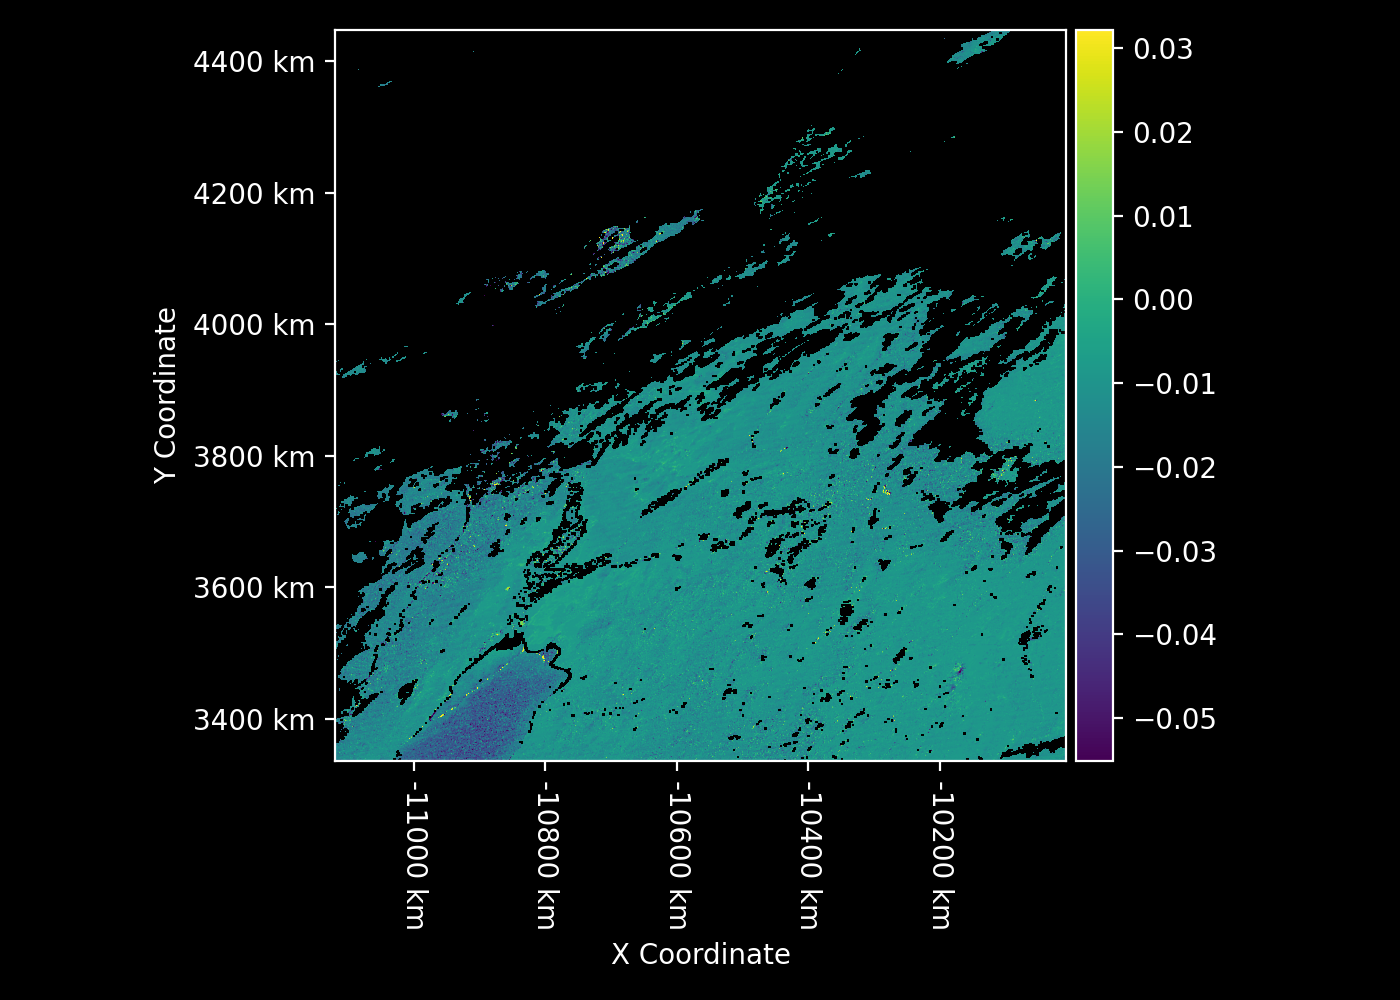

In [9]:
NDVI_diff = NDVI_C2 - NDVI_C1
NDVI_diff.cmap = "viridis"
NDVI_diff

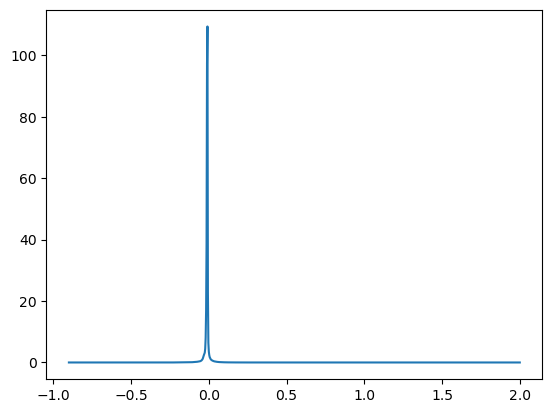

In [10]:
values = np.array(NDVI_diff).flatten()
values = values[~np.isnan(values)]
x = np.linspace(np.min(values), np.max(values), 1000)
density = gaussian_kde(values)
y = density(x)
plt.plot(x, y)
plt.show()

In [11]:
np.nanmean(NDVI_diff)

-0.01146239669077329

In [12]:
np.nanmedian(NDVI_diff)

-0.01046611356343656